<a href="https://colab.research.google.com/github/joseenrico/Analysis-Data/blob/main/Practice_Case_Study_byRevoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca Dataset

In [ ]:
df = pd.read_csv('Games Sales - Case Study - Games (1).csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

# Data Cleaning

##### Dari info dataset dan colums diatas ada dua yang harus diubah, release dimana itu harusnya type data date_time, dan dilihat dari data sales bisa diconvert ke integer.

In [ ]:
# Ganti kolom release to date_time type.
df['Release'] = pd.to_datetime(df['Release'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# Ganti sales ke int
int_columns = ['Sales']
df[int_columns] = df[int_columns].astype(int)
df[int_columns]

,Sales
0,42
1,33
2,20
3,20
4,17
...,...
172,1
173,1
174,1
175,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    int64         
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ KB


# Remove duplicated

In [ ]:
# Clean the duplicate data
df.duplicated().sum()

2

In [ ]:
# tampilkan yang duplicated.
df[df.duplicated(keep=False)]

,Name,Sales,Series,Release,Genre,Developer,Publisher
157,StarCraft II: Heart of the Swarm,1,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
158,StarCraft II: Legacy of the Void,1,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
175,StarCraft II: Heart of the Swarm,1,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
#drop duplicated data.
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Missing value

In [ ]:
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [ ]:
#cek presentase data yang hilang
series = df['Series'].isna().mean()*100
print('Presentase data yang hilang: {:.2f}%'.format(series))

Presentase data yang hilang: 20.57%


##### missing value 20% jadi tidak perlu di remove.

## Cari game terbaru dan terlama

In [ ]:
## SORTING 1
sorted_games = df.sort_values(by=['Release'])
terlama = sorted_games.iloc[0]['Name']
terbaru = sorted_games.iloc[-1]['Name']

print('Game Terlama adalah :', terlama)
print('Game Terbaru adalah :', terbaru)

Game Terlama adalah : Hydlide
Game Terbaru adalah : Valheim


In [ ]:
## SORTING 2
df.sort_values('Release', ascending=False)

,Name,Sales,Series,Release,Genre,Developer,Publisher
20,Valheim,6,NaN,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing
27,Cyberpunk 2077,4,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt
110,Crusader Kings III,1,Crusader Kings,2020-09-01,Grand strategy,Paradox Development Studio,Paradox Interactive
10,Fall Guys,10,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
139,Mordhau,1,NaN,2019-04-01,Action,Triternion,Triternion
...,...,...,...,...,...,...,...
22,Last Ninja 2,5,The Last Ninja,1988-08-01,Action-adventure,System 3,Activision
162,Tetris,1,Tetris,1988-01-01,Puzzle,Spectrum HoloByte,Spectrum HoloByte
88,International Karate,1,International Karate,1985-11-01,Fighting,System 3,Epyx
34,Where in the World Is Carmen Sandiego?,4,Carmen Sandiego,1985-06-01,Educational,Broderbund,Broderbund


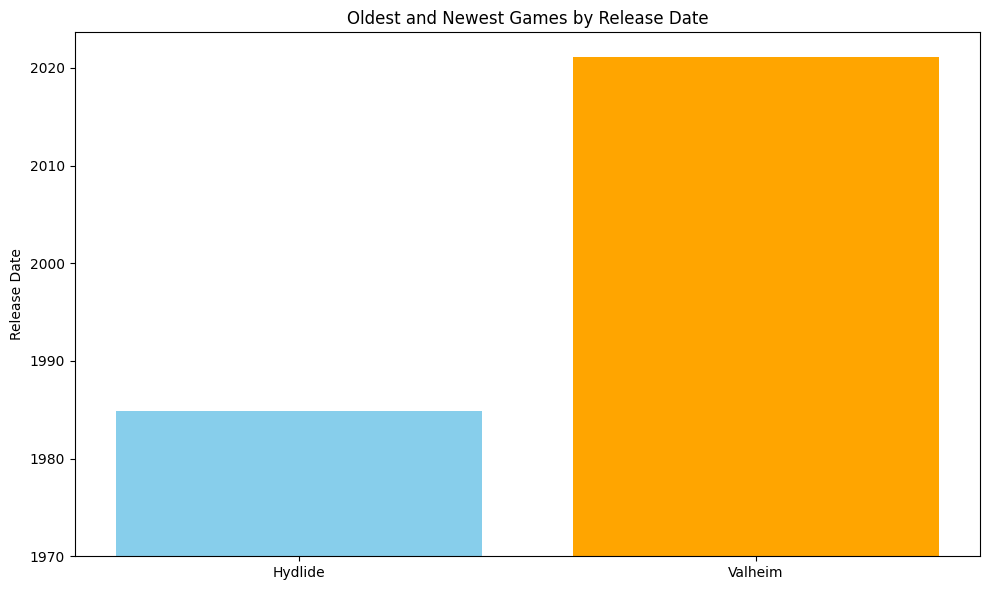

In [ ]:
# Tentukan game terlama dan terbaru berdasarkan kolom 'Release'
oldest_game = df.loc[df['Release'].idxmin()]
newest_game = df.loc[df['Release'].idxmax()]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar([oldest_game['Name'], newest_game['Name']], [oldest_game['Release'], newest_game['Release']], color=['skyblue', 'orange'])
plt.title('Oldest and Newest Games by Release Date')
plt.ylabel('Release Date')
plt.tight_layout()
plt.show()

In [ ]:
df['Publisher'].value_counts()

Publisher
Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: count, Length: 96, dtype: int64

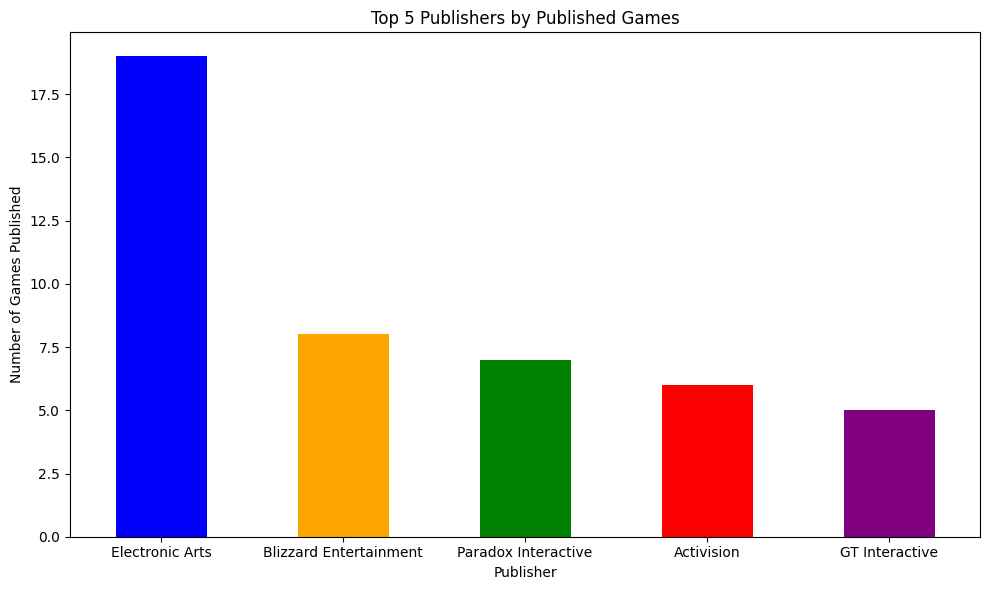

In [ ]:
publisher_counts = df['Publisher'].value_counts().head(5)
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Buat bar chart
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color=colors)
plt.title('Top 5 Publishers by Published Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df['Developer'].value_counts()

Developer
Blizzard Entertainment             8
Maxis                              6
Paradox Development Studio         5
id Software                        4
Westwood Studios                   4
                                  ..
Kojima Productions                 1
Edmund McMillen & Florian Himsl    1
Landfall Games                     1
Keen Software House                1
Microsoft                          1
Name: count, Length: 109, dtype: int64

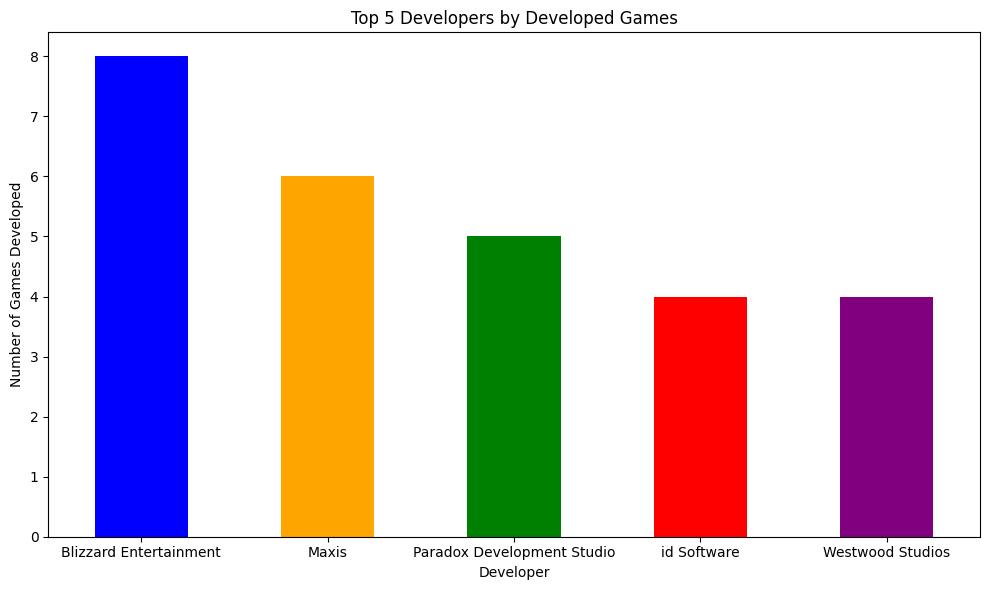

In [ ]:
developer_counts = df['Developer'].value_counts().head(5)
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Buat bar chart
plt.figure(figsize=(10, 6))
developer_counts.plot(kind='bar', color=colors)
plt.title('Top 5 Developers by Developed Games')
plt.xlabel('Developer')
plt.ylabel('Number of Games Developed')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

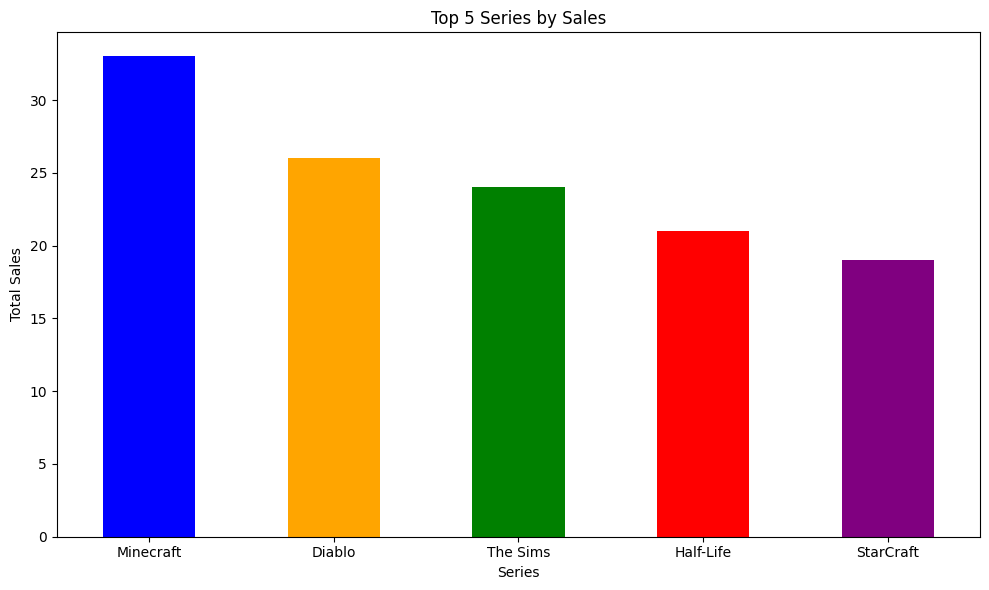

In [ ]:
# Kelompokkan data berdasarkan Series dan jumlahkan penjualan (Sales) untuk setiap Series
series_sales = df.groupby('Series')['Sales'].sum()

# Ambil lima Series teratas berdasarkan total penjualan
top_5_series = series_sales.nlargest(5)

# Buat bar chart
plt.figure(figsize=(10, 6))
top_5_series.plot(kind='bar', color=colors)
plt.title('Top 5 Series by Sales')
plt.xlabel('Series')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Hitung jumlah nilai non-null di kolom 'Name' untuk setiap 'Series'
series_name_counts = df.groupby('Series').count('Name').sort_values(ascending=False)

# Ambil lima 'Series' teratas
top_5_series_with_names = series_name_counts.head(5)

# Buat bar chart
plt.figure(figsize=(10, 6))
top_5_series_with_names.plot(kind='bar', color='skyblue')
plt.title('Top 5 Series with Non-null Names Count')
plt.xlabel('Series')
plt.ylabel('Count of Non-null Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: GroupBy.count() takes 1 positional argument but 2 were given